# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# city = "mecca"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    # print (city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | provideniya
Processing Record 5 of Set 1 | carmen
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | karaman
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | victoria
Processing Record 20 of Set 1 | ancud
P

In [9]:
import pprint
city = "mecca"
city_weather = requests.get(city_url).json()
pprint.pprint(city_weather)
print(city_weather['main']['temp_max'])

{'base': 'stations',
 'clouds': {'all': 54},
 'cod': 200,
 'coord': {'lat': -38.3833, 'lon': 142.4833},
 'dt': 1675822351,
 'id': 2144528,
 'main': {'feels_like': 290.98,
          'grnd_level': 1014,
          'humidity': 63,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 291.45,
          'temp_max': 291.45,
          'temp_min': 291.45},
 'name': 'Warrnambool',
 'sys': {'country': 'AU', 'sunrise': 1675799399, 'sunset': 1675849110},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 156, 'gust': 6.5, 'speed': 6.32}}
291.45


In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [11]:
# Temperatures were given to us in Kelvin, rather than Celcius.  Convert to Celcius

# Since we're testing, make inline changes to a copy of the dataframe
city_data_c_df = city_data_df.copy()

# Iterate over each record in 
for record in city_data_c_df["Max Temp"]:
    # print(f"item = {item}")
    city_data_c_df = city_data_c_df.replace(record ,record - 273.75)

# Copy city_data_df back to city_data_c_df:
city_data_df = city_data_c_df.copy()
    
# city_data_c_df
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,6.82,86,98,2.81,AR,1675822320
1,ribeira grande,38.5167,-28.7000,12.61,64,9,3.13,PT,1675822165
2,provideniya,64.3833,-173.3000,-19.54,65,100,3.00,RU,1675822174
3,carmen,18.6333,-91.8333,27.42,61,0,2.57,MX,1675822218
4,khatanga,71.9667,102.5000,-44.78,100,64,1.26,RU,1675822180
...,...,...,...,...,...,...,...,...,...
541,pacifica,37.6138,-122.4869,13.05,77,40,6.17,US,1675822614
542,grootfontein,-19.5667,18.1167,17.16,88,100,1.03,NA,1675822615
543,alcains,39.9164,-7.4566,7.13,85,100,4.16,PT,1675822615
544,lahaina,20.8783,-156.6825,25.98,87,20,4.85,US,1675822616


In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,6.82,86,98,2.81,AR,1675822320
1,ribeira grande,38.5167,-28.7000,12.61,64,9,3.13,PT,1675822165
2,provideniya,64.3833,-173.3000,-19.54,65,100,3.00,RU,1675822174
3,carmen,18.6333,-91.8333,27.42,61,0,2.57,MX,1675822218
4,khatanga,71.9667,102.5000,-44.78,100,64,1.26,RU,1675822180


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,6.82,86,98,2.81,AR,1675822320
1,ribeira grande,38.5167,-28.7000,12.61,64,9,3.13,PT,1675822165
2,provideniya,64.3833,-173.3000,-19.54,65,100,3.00,RU,1675822174
3,carmen,18.6333,-91.8333,27.42,61,0,2.57,MX,1675822218
4,khatanga,71.9667,102.5000,-44.78,100,64,1.26,RU,1675822180


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [15]:
# Get date for various plots

from time import gmtime, strftime

# print(city_date)

date_time = gmtime(city_date)
# print(f"time = {date_time}")

date = strftime("%Y-%m-%d", date_time)
# print(f"date = {date}")

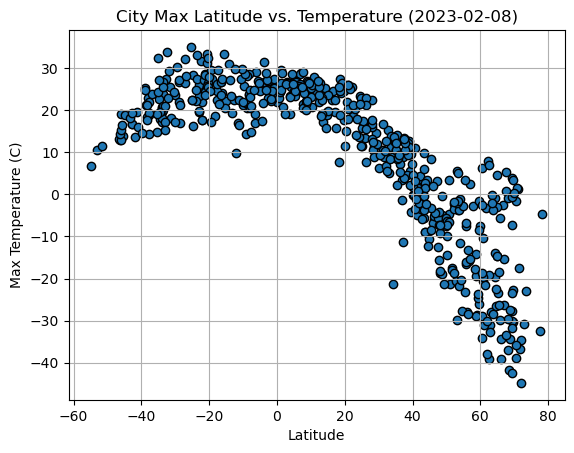

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

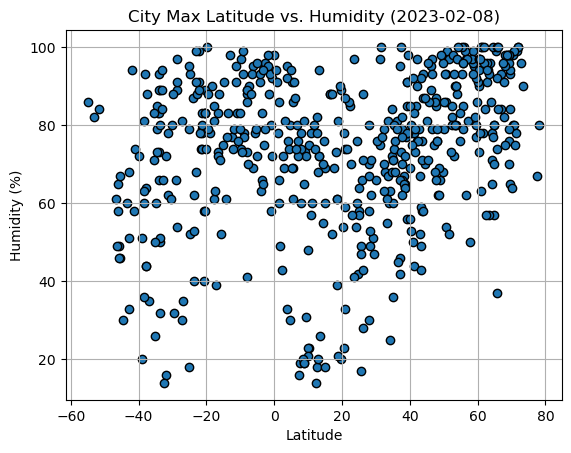

In [17]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

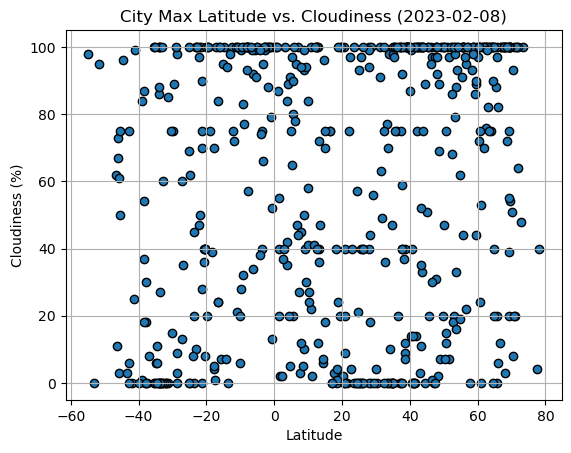

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Max Latitude vs. Cloudiness ({date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

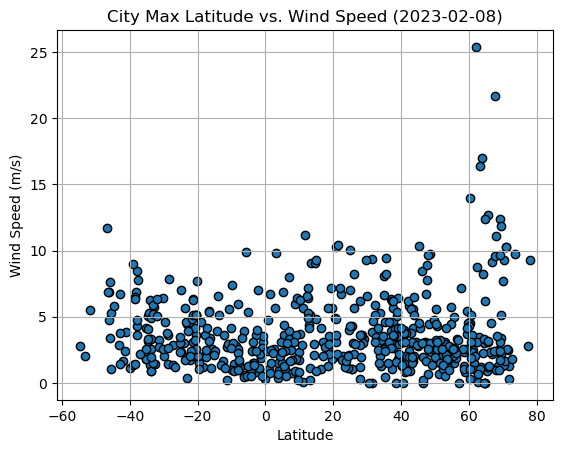

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Max Latitude vs. Wind Speed ({date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ribeira grande,38.5167,-28.7000,12.61,64,9,3.13,PT,1675822165
2,provideniya,64.3833,-173.3000,-19.54,65,100,3.00,RU,1675822174
3,carmen,18.6333,-91.8333,27.42,61,0,2.57,MX,1675822218
4,khatanga,71.9667,102.5000,-44.78,100,64,1.26,RU,1675822180
6,karaman,37.0833,33.2500,-11.44,95,100,6.37,TR,1675822453


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,6.82,86,98,2.81,AR,1675822320
5,port elizabeth,-33.9180,25.5701,19.57,93,100,1.34,ZA,1675822166
10,busselton,-33.6500,115.3333,23.82,50,0,2.56,AU,1675822147
12,rikitea,-23.1203,-134.9692,26.05,68,10,4.45,PF,1675822150
13,atuona,-9.8000,-139.0333,25.67,74,28,7.37,PF,1675822152


###  Temperature vs. Latitude Linear Regression Plot

In [22]:
# Define a function to create linear regression plots
def lin(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    # print(f"{slope}, {intercept}, {rvalue}, {pvalue}, {stderr}")

    regress_values = x * slope + intercept
    # print(f"{regress_values}")

    lin_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # print(f"{regress_values, lin_eq}")
    return (regress_values, lin_eq, pvalue, rvalue)

In [37]:
# print(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
lin_data = lin(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
# print(lin_data)

The p-value is: 2.142708801183892e-114
The r-value is: -0.8699080874565447


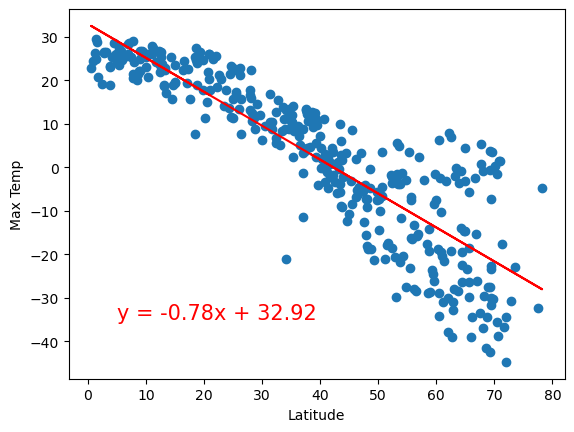

In [62]:
# Linear regression on Northern Hemisphere
lin_data = lin(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
# print(f'The line_eq is: {lin_data[1]}')
print(f'The p-value is: {lin_data[2]}')
print(f'The r-value is: {lin_data[3]}')
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"],lin_data[0],"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(lin_data[1],(5,-35),fontsize=15,color="red")
plt.show()

The p-value is: 2.0288938025000996e-09
The r-value is: 0.4303445836783264


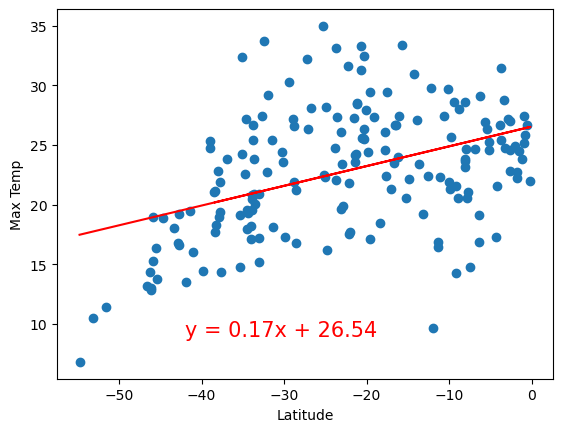

In [73]:
# Linear regression on Southern Hemisphere
lin_data = lin(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
# print(f'The line_eq is: {lin_data[1]}')
print(f'The p-value is: {lin_data[2]}')
print(f'The r-value is: {lin_data[3]}')
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"],lin_data[0],"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(lin_data[1],(-42,9),fontsize=15,color="red")
plt.show()

In the Northern Hemisphere, temperature was strongly coorelated with latitude, and declines by around 4 degrees Celcius for every 5 degrees increase in latitude. 
In the Southern Hemisphere, temperature was moderately coorelated with latitude, and increases by roughly 1 degree celcius for every 6 degrees increase in latitude.  

### Humidity vs. Latitude Linear Regression Plot

The p-value is: 2.848239148115276e-21
The r-value is: 0.46636983950221494


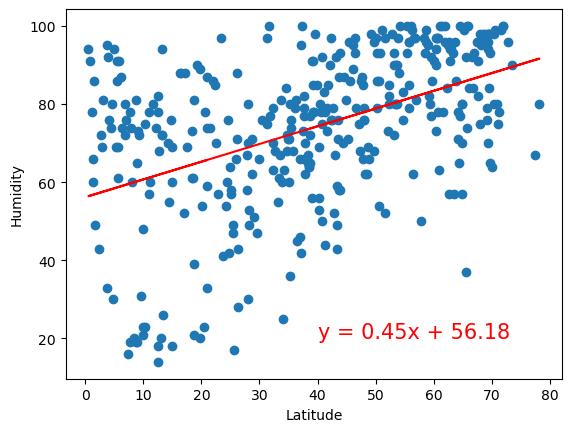

In [60]:
# Northern Hemisphere
lin_data = lin(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
# print(f'The line_eq is: {lin_data[1]}')
print(f'The p-value is: {lin_data[2]}')
print(f'The r-value is: {lin_data[3]}')
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"],lin_data[0],"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(lin_data[1],(40,20),fontsize=15,color="red")
plt.show()

The p-value is: 2.198653534261227e-08
The r-value is: 0.4042183536296865


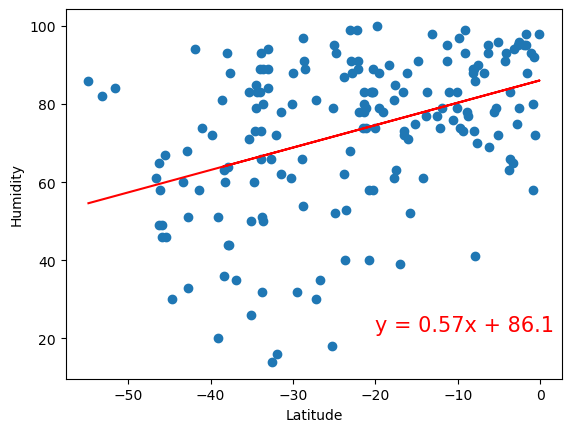

In [64]:
# Southern Hemisphere
lin_data = lin(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
# print(f'The line_eq is: {lin_data[1]}')
print(f'The p-value is: {lin_data[2]}')
print(f'The r-value is: {lin_data[3]}')
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"],lin_data[0],"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(lin_data[1],(-20,22),fontsize=15,color="red")
plt.show()

In both the Northern and Southern hemispheres, humidity was moderately coorelated with latitude and gradually increased as we approached the equator by around 1% per degree.  

### Cloudiness vs. Latitude Linear Regression Plot

The p-value is: 2.796477287417476e-06
The r-value is: 0.24143338276302087


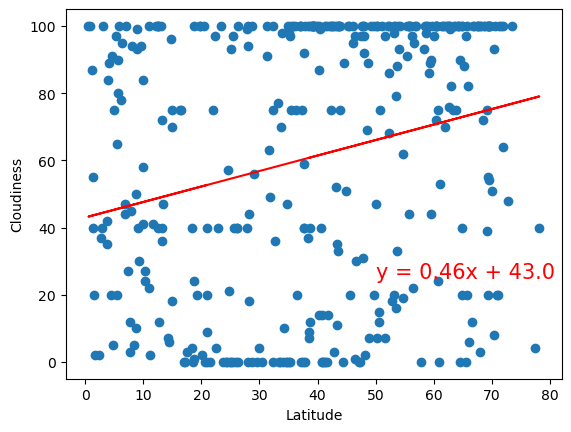

In [65]:
# Northern Hemisphere
lin_data = lin(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
# print(f'The line_eq is: {lin_data[1]}')
print(f'The p-value is: {lin_data[2]}')
print(f'The r-value is: {lin_data[3]}')
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"],lin_data[0],"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(lin_data[1],(50,25),fontsize=15,color="red")
plt.show()

The p-value is: 4.22130898081703e-08
The r-value is: 0.3966582277394862


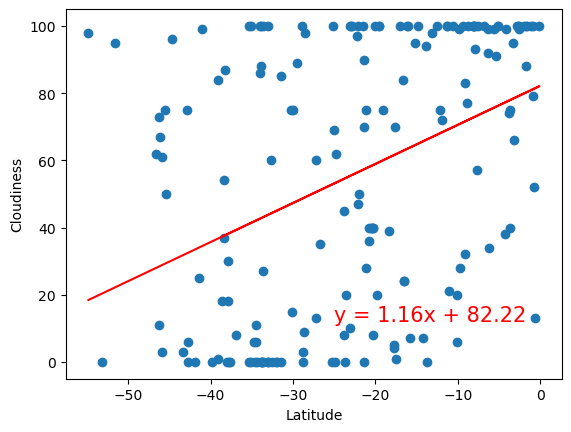

In [66]:
# Southern Hemisphere
lin_data = lin(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
# print(f'The line_eq is: {lin_data[1]}')
print(f'The p-value is: {lin_data[2]}')
print(f'The r-value is: {lin_data[3]}')
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"],lin_data[0],"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(lin_data[1],(-25,12),fontsize=15,color="red")
plt.show()

In the Northern Hemisphere, cloudiness was weakly correlated with latitude and increased by around 1% per degree as we approached the equator.  In the Southern Hemisphere, cloudiness was moderately correlated with latitude and increased more rapidly, by over 1% increase in cloudiness per degree as we approached the equator.  

### Wind Speed vs. Latitude Linear Regression Plot

The p-value is: 0.060129168658036435
The r-value is: 0.09809098152727308


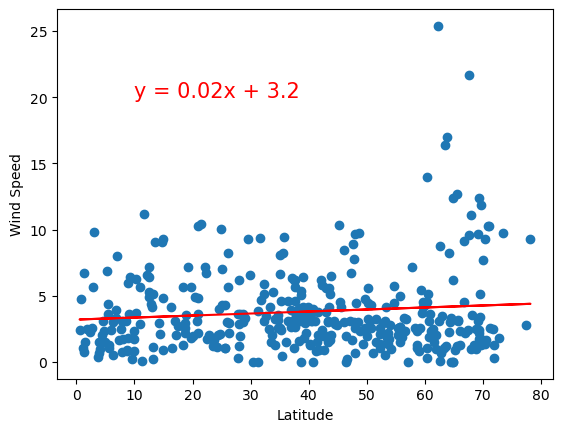

In [57]:
# Northern Hemisphere
lin_data = lin(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
# print(f'The line_eq is: {lin_data[1]}')
print(f'The p-value is: {lin_data[2]}')
print(f'The r-value is: {lin_data[3]}')
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"],lin_data[0],"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(lin_data[1],(10,20),fontsize=15,color="red")
plt.show()

The p-value is: 1.776705868292092e-05
The r-value is: -0.3156068744643027


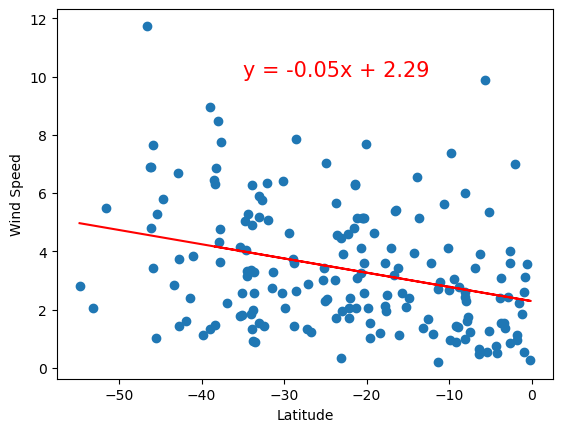

In [67]:
# Southern Hemisphere
lin_data = lin(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
# print(f'The line_eq is: {lin_data[1]}')
print(f'The p-value is: {lin_data[2]}')
print(f'The r-value is: {lin_data[3]}')
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"],lin_data[0],"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(lin_data[1],(-35,10),fontsize=15,color="red")
plt.show()

In the Northern Hemisphere, wind speed was too weakly coorelated with latitude to draw any conclusions.  In the Southern Hemisphere, wind speed was weakly correlated wth latitude, and increased by 1 mile per hour for every 20 degrees increase in latitude.   